In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


While both ``scikit-learn`` and ``statsmodels``packages can train linear models, they differ in several ways and serve different purposes. In general, ``scikit-learn`` is designed for prediction, while ``statsmodels``  is more suitable for explanatory/inferential analysis.  We use ``scikit-learn`` for machine learning.

- Check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to learn more details about ``LinearRegression`` function from ``scikit-learn`` package.

# 1. Simple and Multiple Linear Regression

## 1.1 Data Preparation

In [2]:
ads = pd.read_csv('advertising.csv')    # you may need to modify the path 

ads.describe()                          # statistical summary of all numerical variables, any features need scaling? 

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### 1.1(a) Split the Data  

Let's split the data into train and test sets. 


In [3]:
X = ads.drop(columns = 'Sales')      # features in 2D

y = ads['Sales']                     # target in 1D

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)       # split data into train & test

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(160, 3)

(40, 3)

(160,)

(40,)

### 1.1(b) Scale the features 

Fit the scaler with the training set, then apply the trained scaler to transform the training and test sets later.

- **Never** fit the scaler to test data: referencing the test data in model training can lead to **data leakage**. 

In [4]:
scaler = MinMaxScaler()          # define a scaler 

scaler.fit(X_train)              # fit the scaler to train set

X_train_scaled = scaler.transform(X_train)   # apply the scaler to transform the train set

X_test_scaled  = scaler.transform(X_test)    # apply the scaler to transform the test set

Alternatively, we can combine both the ``train`` and ``transform`` step on the train set with below codes: 
```python
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)   # scaler fitting and transformation on train set in one-go
X_test_scaled  = scaler.transform(X_test)        # apply the scaler to tranform test set only
```

Both **X_train_scaled** and **X_test_scaled** are 2D arrays without column names, let's add column names back for easier demonstration.

In [5]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)

X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

display(X_train_scaled.describe(), X_test_scaled.describe())  # note the max of test features is NOT 0

,TV,Radio,Newspaper
count,160.000000,160.000000,160.000000
mean,0.500917,0.471535,0.292256
std,0.290651,0.297102,0.214448
min,0.000000,0.000000,0.000000
25%,0.247263,0.192036,0.107750
50%,0.524461,0.489919,0.250000
75%,0.739822,0.732863,0.442000
max,1.000000,1.000000,1.000000


,TV,Radio,Newspaper
count,40.000000,40.000000,40.000000
mean,0.441464,0.459022,0.313675
std,0.304784,0.311751,0.232708
min,-0.011632,0.006048,-0.006000
25%,0.186965,0.220766,0.143500
50%,0.421827,0.408266,0.237500
75%,0.671656,0.744960,0.430000
max,0.977078,0.995968,1.131000


## 1.2 Simple Linear Regression

### 1.2(a) Modeling

Let's train a linear regression model **lm1** to predict **Sales**  with **TV** advertising expenditure.

- Make sure the features (even there is only one here) are in a 2D data frame/array.

In [6]:
lm1 = LinearRegression()                 # define a model

lm1.fit(X_train_scaled[['TV']], y_train)  # return a fitted model

#lm1 = LinearRegression().fit(X_train_scaled[['TV']], y_train)      # alternatively, combine the above two steps

print("lm1 intercept(w0): ", lm1.intercept_)  
print("lm1 coefficients (w1): ", lm1.coef_)   
print("lm1 features: ", lm1.feature_names_in_)              # feature names seen in model fitting

lm1 intercept(w0):  7.48112571093173
lm1 coefficients (w1):  [13.4480769]
lm1 features:  ['TV']


### 1.2(b) Model Application and Evaluation

**Prediction and Evaluation on Train Set** 

Predict the sales values for each market according to their TV ads expenditure.

In [7]:
train_pred1 = lm1.predict(X_train_scaled[['TV']])    # Note feature data should always in 2D

train_pred1     

array([ 8.99018121,  8.74173915, 13.86700691, 16.93572647, 17.20257165,
       12.01749377,  7.68816076,  8.07002542, 13.07567293, 12.10490857,
       12.34414907, 17.85128149, 18.96927077, 15.79933407,  9.34904197,
       10.15877907, 20.76817535, 15.22883748, 16.60907117,  7.62835064,
       19.49375958, 16.383633  , 17.3451958 , 14.06944118, 15.17362813,
       17.30838957, 19.3787401 , 14.81476737, 11.91167585, 10.80288812,
       15.79933407, 13.47133992, 19.88482579, 20.92920261, 11.71844313,
       12.34414907, 19.04288324, 16.68268363, 18.33896406, 16.20420262,
       16.08458237, 11.4193925 ,  9.27082873,  9.04999134,  7.89519582,
       18.30215783,  8.08382775, 16.98633504,  8.47029319, 15.43587253,
       16.81150544, 10.33360867, 14.17985988, 13.24590175, 11.62642755,
       20.02284916, 20.03205071,  7.65135453, 18.83584818, 15.37606241,
        7.83078491, 10.76608189, 16.48485014, 17.87888616, 12.23373038,
       17.68105267, 14.80556582, 13.32411499, 16.80690466, 15.43

Regression models are evaluated in terms of R2 and Mean Squared Error.   

- **String Formating**: Here we format numeric outputs with the `format` method of strings (check [documentation](https://docs.python.org/3/library/stdtypes.html#str.format)).  The method places numbers in specific positions of the string and format them according to the format specifier within the place holder `{}`.   


In [8]:
mse_train = mean_squared_error(y_train, train_pred1)  

r2_train = r2_score(y_train, train_pred1)              # r2_train = lm1.score(X_train_scaled[['TV']], y_train)

print("lm1 Train MSE: {:.2f}".format(mse_train))       # round to 2 decimal places, display as floating number
print("lm1 Train R2: {:.2%}".format(r2_train))         # round to 2 decimal places, display as percentage 

lm1 Train MSE: 10.62
lm1 Train R2: 58.85%


**Prediction and Evaluation on Test Set**

Check R2 and Mean Squared Error on the test set. 

- Make sure we transform test features before apply the model for prediction. We already transformed **X_test** into **X_test_scaled**  earlier.  

In [9]:
test_pred1 = lm1.predict(X_test_scaled[['TV']])         # predict sales on scaled test data

mse_test = mean_squared_error(y_test, test_pred1)

r2_test = r2_score(y_test, test_pred1)                  # r2_test = lm2.score(X_test_scaled[['TV']], y_test)

print("lm1 Test MSE: {:.2f}".format(mse_test))
print("lm1 Test R2: {:.2%}".format(r2_test))     

lm1 Test MSE: 10.19
lm1 Test R2: 67.63%


## 1.3 Multiple Linear Regression


### 1.3(a) Modeling

Build another model **lm2** to predict **Sales**  with **TV**, **Radio**, **Newspaper** advertising expenditure together.

In [10]:
lm2 = LinearRegression().fit(X_train_scaled, y_train)    # now we use all three features (X_train_scaled)

print("lm2 intercept(w0): ", lm2.intercept_)
print("lm2 coefficients (w1,w2,w3): ", lm2.coef_)
print("lm2 features: ", lm2.feature_names_in_)

lm2 intercept(w0):  3.1751841954034408
lm2 coefficients (w1,w2,w3):  [13.03190908  9.74625289 -0.2781464 ]
lm2 features:  ['TV' 'Radio' 'Newspaper']



### 1.3(b) Model Application and Evaluation

**Prediction and Evaluation on Train Set**

In [11]:
train_pred2 = lm2.predict(X_train_scaled)

mse_train2 = mean_squared_error(y_train, train_pred2)

r2_train2 = r2_score(y_train, train_pred2)                 # r2_train2 = lm1.score(X_train_scaled, y_train)

print("lm2 Train MSE: {:.2f}".format(mse_train2))
print("lm2 Train R2: {:.2%}".format(r2_train2))            # explained more variance than lm1(train) 

lm2 Train MSE: 2.41
lm2 Train R2: 90.67%


**Prediction and Evaluation on Test Set**

Check R2 and MSE for **lm2** on test data.

<font color=red>***Exercise 1: Your Codes Here***</font>  


In [12]:
test_pred2 = lm2.predict(X_test_scaled)            #  use X_test_scaled for prediction

mse_test2 = mean_squared_error(y_test, test_pred2)

r2_test2 = r2_score(y_test, test_pred2)            # r2_test2 = lm1.score(X_test_scaled, y_test)

print("lm2 Test MSE: {:.2f}".format(mse_test2))
print("lm2 Test R2: {:.2%}".format(r2_test2))      # explained more variance than lm1(test) 

lm2 Test MSE: 4.40
lm2 Test R2: 86.01%


# 2. Categorical and Polynomial Features

## 2.1 Data Preparation

Let's start with a new dataset **house_price.csv** for this section. 

In [13]:
house = pd.read_csv('house_price.csv')   # you may need to modify the path 

display(house.shape, house.head())

(1000, 5)

,dist,age,room,school,price
0,2.000000,12,3,1,17748.526691
1,2.048048,15,3,1,15734.586643
2,2.096096,21,4,0,17801.694257
3,2.144144,0,3,1,20155.145308
4,2.192192,3,4,0,18883.183762


**Split the Data into Train and Test**

- Here let's skip the scaling step for simplicity. 

In [14]:
X = house.drop(columns = 'price')

y = house['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)    

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 4)

(200, 4)

(800,)

(200,)

## 2.2 Categorical Features

### 2.2(a) Modeling

Let's train **lm3** to predict **price** with four features: **dist**, **age**, **room**, and **school**. How shall we we interpret the coefficent for **school** (w4)?

- Note that feature **school** means whether the house is close to any top ranked school (within 2km): 1 means yes, 0 means no.  
- To transform categorical variables with multiple unique values, please check the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) of ``pandas.get_dummies`` function.

In [15]:
lm3 = LinearRegression().fit(X_train, y_train)     # train a model with all features

print("lm3 intercept: ",lm3.intercept_)
print("lm3 coefficients: ", lm3.coef_)
print("lm3 features: ", lm3.feature_names_in_)   

lm3 intercept:  27333.76833092165
lm3 coefficients:  [-206.6458122  -760.50998783  321.35940265  548.76431954]
lm3 features:  ['dist' 'age' 'room' 'school']


### 2.2(b) Model Evaluation

Let's evaluate the model on both train and test data by calculting the R2.  

In [16]:
train_pred3 = lm3.predict(X_train)
r2_train3 = r2_score(y_train, train_pred3)      # r2_train3 = lm3.score(X_train, y_train)

test_pred3 = lm3.predict(X_test)
r2_test3 = r2_score(y_test, test_pred3)         # r2_test3 = lm3.score(X_test, y_test)

print("lm3 Train R2: {:.2%}".format(r2_train3))  
print("lm3 test R2: {:.2%}".format(r2_test3))

lm3 Train R2: 78.84%
lm3 test R2: 81.48%


## 2.3 Polynomial Features: Interaction Terms only

To generate interaction features, we use  ``PolynomialFeatures`` function from ``sklearn.preprocessing`` module. The function generates a new feature matrix consisting of all polynomial combinations of  the input features with degree less than or equal to the specified degree.   Check [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) for details.

- By default, `interaction_only=False`, therefore the function returns both interaction and exponential features. 

### 2.3(a) Feature Engineering

Here let's keep only interaction terms with maxmium ``degree = 2`` (default), as we only need 2 degree interaction here.   

**We get 10 features in total!**   


In [17]:
poly1 = PolynomialFeatures(degree = 2,               # degree 2 (default, can skip here) 
                           interaction_only = True,  # default False, return both interaction and expoential terms
                           include_bias = False)     # no need to add 1 for intercept (auto-added in the model)  
                                                               
X_train_poly = poly1.fit_transform(X_train)         # fit the transformer on train set and transform it (can separate into two steps) 

display(X_train_poly.shape, poly1.get_feature_names_out())       

(800, 10)

array(['dist', 'age', 'room', 'school', 'dist age', 'dist room',
       'dist school', 'age room', 'age school', 'room school'],
      dtype=object)

### 2.3(b) Modeling


Let's train **lm4** with all the 10 features (different from the lecture), and display all parameters. 

- Here we create two dataframes and concatenate them using `pandas.concat` function. Check [documentation](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) for details.

- Note that **lm4** has no **feature_names_in_** attribute, as **X_train_poly** is an 2D array without column names. Therefore, we  get the feature names from the polynomial transformer trained above.


In [18]:
# train the model
lm4 = LinearRegression().fit(X_train_poly, y_train)      

# save intercepts in a dataframe, note we put the single value in a list to avoid value error
intercept = pd.DataFrame({'features': ['intercept'], 'parameters': [lm4.intercept_]})    

# save coefficients and feature names in a data frame 
coefs = pd.DataFrame({'features':poly1.get_feature_names_out(), "parameters": lm4.coef_}) 

# concatenate the two dataframes along rows (reset index)
pd.concat([intercept, coefs], ignore_index = True)    

,features,parameters
0,intercept,23046.929479
1,dist,-40.672195
2,age,-399.223853
3,room,317.761946
4,school,-368.082695
5,dist age,-13.777894
6,dist room,0.352720
7,dist school,29.075926
8,age room,-0.860280
9,age school,-6.046453


### 2.3(c) Model Evaluation 

**Model Evaluation on Train Set**

- Check R2 only.  

In [19]:
train_pred4 = lm4.predict(X_train_poly)               # make predictions with transformed features!

r2_train4  = r2_score(y_train, train_pred4)           # r2_train4 = lm4.score(X_train_poly, y_train)

print("lm4 Train R2: {:.2%}".format(r2_train4))       # higher than lm3 (train)

lm4 Train R2: 82.97%


**Model Evaluation on Test Set**

- **Hint**: need to apply the fitted transformer **poly1**  to transform **X_test** before prediction/evaluation.  Make sure we do NOT fit the transformer again. 

<font color=red>***Exercise 2: Your Codes Here***</font>  


In [20]:
X_test_poly = poly1.transform(X_test)          # transform test features first  

test_pred4 = lm4.predict(X_test_poly)  

r2_test4 = r2_score(y_test, test_pred4)        # r2_test4 = lm4.score(X_test_poly, y_test)

print("lm4 Test R2: {:.2%}".format(r2_test4))  # higher than lm3(test)

lm4 Test R2: 86.08%


## 2.4 Polynomial Features: Exponential Terms only

### 2.4(a) Data Simulation and Preparation

As the house price data is not suitable for demonstration of exponential features, let's create a simulated data set as below.

- To create **X**, we use `numpy.random.rand` function to generate 500 random numbers from a uniform distribution over [0, 1). Check [documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html) for details.

- To create **y**, we (1) use `numpy.sin` function (check [documentation](https://numpy.org/doc/stable/reference/generated/numpy.sin.html)  for details) to apply non-linear transformation of **X**, and (2) use `numpy.random.stand_normal` function  (check [documentaion](https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_normal.html) for details) to generate 500 random numbers from a standard normal distribution (mean = 0, std = 1) as random errors.



In [21]:
np.random.seed(1)                                      # set random seed

X = 10 * np.random.rand(500)                           # X: 500 random values from a uniform distribution over [0, 1) 

y = np.sin(X) + 0.1 * np.random.standard_normal(500)   # y: apply non-linear transformation to X + some random errors from standard normal distribution 

df = pd.DataFrame({'X': X, 'y': y})                    # convert as a dataframe

display(df.shape, df.head())

(500, 2)

,X,y
0,4.170220,-0.868190
1,7.203245,0.778092
2,0.001144,-0.092248
3,3.023326,0.064689
4,1.467559,0.852020


**Split the Data into Train and Test**

- Again, let's skip feature scaling for simplicity.  

In [22]:
X = df[['X']]    # 2D features, same as df.drop(columns = 'y')

y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)    

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(400, 1)

(100, 1)

(400,)

(100,)

**Visualize the data**

Use `matplotlib.pyplot.scatter` function to create scatter plots. Check [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) for details.
- The parameter `c` or `color` takes a single color (to set same color for all instances) or a list of [colors](https://matplotlib.org/stable/users/explain/colors/colors.html#colors-def) (to set different colors for instances).
- The difference of the two parameters are covered in week 6. 

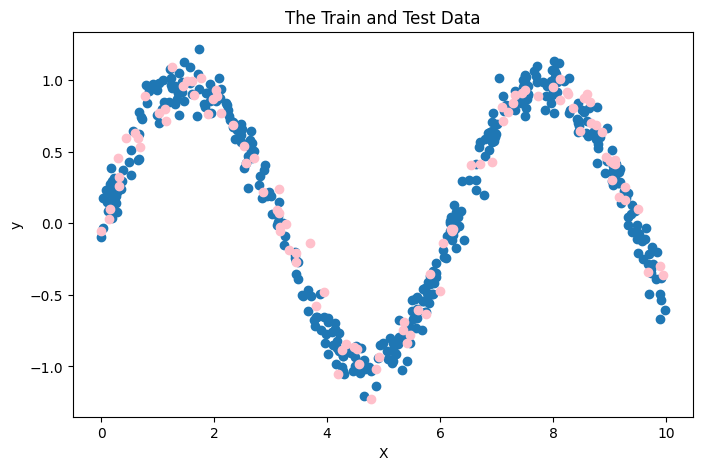

In [23]:
plt.figure(figsize=(8,5))                                     # create a figure with 8/5 inches for width/height
plt.scatter(x = X_train['X'], y = y_train)                    # plot the train data (default color blue)
plt.scatter(x = X_test['X'], y = y_test, c = 'pink')          # plot the test data with a different color
plt.xlabel('X')
plt.ylabel('y')
plt.title('The Train and Test Data')
plt.show()

### 2.4(b) Feature Engineering, Modeling, and Evaluation

<font color=red>***Exercise 3: Your Codes Here***</font>  

Please complete the following four steps.


**Step 1: Feature Engineering**

Please create a polynomial transformer to raise **X** to its 7th degree(X^2, X^3... X^7).  Name the transformer as **poly2** and tranform **X_train** as **X_train_poly**.

- Note by default ``interaction_only = False``, which will generate both interaction and exponential terms. However, as we have only one feature here, no interaction terms can be generated.   

In [24]:
poly2 = PolynomialFeatures(degree = 7, include_bias = False)        

X_train_poly = poly2.fit_transform(X_train) 

display(poly2.get_feature_names_out(), X_train_poly.shape)    

array(['X', 'X^2', 'X^3', 'X^4', 'X^5', 'X^6', 'X^7'], dtype=object)

(400, 7)

**Step 2: Train Model lm5 on Train Set**

- Check the parameter values as well.

In [25]:
lm5 = LinearRegression().fit(X_train_poly,y_train) #train the model

intercept2 = pd.DataFrame({'features': ['intercept'], 'parameters': [lm5.intercept_]})     # display intercepts in a dataframe 

coefs2 = pd.DataFrame({'features':poly2.get_feature_names_out(), "parameters": lm5.coef_})  # display coefficients and feature names in a data frame 

pd.concat([intercept2, coefs2], ignore_index = True)   # concatenate the two dataframes

,features,parameters
0,intercept,0.106979
1,X,0.218936
2,X^2,1.270595
3,X^3,-1.011064
4,X^4,0.269386
5,X^5,-0.032131
6,X^6,0.001741
7,X^7,-0.000034


**Step 3: Model Evaluation on Train Set**

- Check the R2 only.


In [26]:
train_pred5 = lm5.predict(X_train_poly)           # predict on transformed X_train

r2_train5 = r2_score(y_train, train_pred5)        # r2_train5 = lm5.score(X_train_poly, y_train)

print("lm5 Train R2: {:.2%}".format(r2_train5))   # almost perfect

lm5 Train R2: 97.56%


**Step 4: Model Evaluation on Test Set**

- **Hint**: need to use **poly2** to transform **X_test** before prediction/evaluation.  

In [27]:
X_test_poly = poly2.transform(X_test)     # transform X_test

test_pred5 = lm5.predict(X_test_poly)     # predict on transformed X_test

r2_test5 = r2_score(y_test, test_pred5)    # r2_test5 = lm5.score(X_test_poly, y_test)

print("lm5 Test R2: {:.2%}".format(r2_test5))  

lm5 Test R2: 96.62%


### 2.4(c) Model Visualization

To visualize the model (a curly line in 2D space), let's generate 1000 evenly spaced values and make predictions for them. 

- Use `numpy.linspace` function to generate 1000 evenly spaced number in a range. Check [documentation](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) for details. Note the stop number is included.
- Alternatively, you may use `numpy.arange` function to create 1000 numbers with even stepsize in a range. Check [documentation](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) for details. Note the stop number is NOT included. 

In [28]:
new_X = np.linspace(0, 10, 1000)         # new X: 1000 numbers evenly spaced over [0,10].

new_X_2D = new_X.reshape(1000,1)         # convert 1D data into a 2D, same as new_X_2D = new_X[:, np.newaxis]  

X_poly = poly2.transform(new_X_2D)       # apply the transformer to transform new_X_2D 

y_pred = lm5.predict(X_poly)             # make predictions, note the warning message   

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


**Plot the Model (with Data)**

Use `matplotlib.pyplot.plot` function (check [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)) to create a line (i.e., the model).   By default, a solid blue line is created to connect all points. 

- `x` : the horizontal coordinate of the data points.
- `y` : the vertical coordinate of the data points.

Note the function relies on **positional arguments** for `x`,  `y` (and `fmt`), NOT **keyword argument**, therefore there is no need to specify the parameter names.  

- Other keyword parameters such as  `linewidth`, `markersize`, `color`/`c` (which override the color in `fmt`) should be placed after positional paramters.

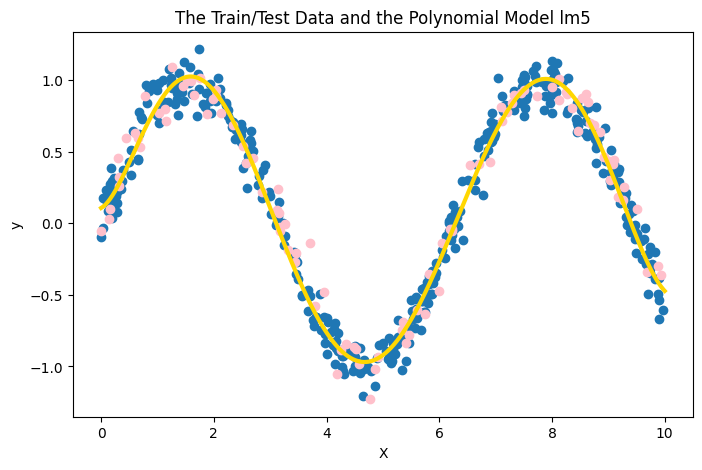

In [29]:
plt.figure(figsize=(8,5))

plt.scatter(x = X_train['X'], y = y_train)                       # plot the train data as well
plt.scatter(x = X_test['X'], y = y_test, c = 'pink')             # plot the test data
plt.plot(new_X, y_pred, c = 'gold', linewidth = 3)               # plot the model as a line defined by new_X and y_pred 

plt.xlabel('X')
plt.ylabel('y')
plt.title('The Train/Test Data and the Polynomial Model lm5')
plt.show()

Training models with high-degree polynomial features can result in overfitting, so we often control the model complexity by adding regularization, resulting in regularized regression models such as Ridge and Lasso regression:

- Explore  the ``Ridge`` (check [documentation](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.Ridge.html)) and ``Lasso`` (check [documentation](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.Lasso.html)) to learn more.